In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
us_health = pd.read_csv("UShealth (2).csv")
dostava = pd.read_excel("dostava (1).xlsx")

In [8]:
us_health

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
us_health.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
us_health.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
us_health.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
us_health.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [19]:
sex_bmi_smoker = us_health.groupby(["sex"])
sex_bmi_smoker["smoker"].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: count, dtype: int64

In [ ]:
## 1/4 su pušači

In [20]:
sex_region = us_health.groupby(["sex"])
sex_region["region"].value_counts()

sex     region   
female  southeast    175
        northwest    164
        southwest    162
        northeast    161
male    southeast    189
        northeast    163
        southwest    163
        northwest    161
Name: count, dtype: int64

In [ ]:
## podhednako su raspođeni

In [21]:
smoker_region = us_health.groupby(["smoker"])
smoker_region["region"].value_counts()

smoker  region   
no      southeast    273
        northwest    267
        southwest    267
        northeast    257
yes     southeast     91
        northeast     67
        northwest     58
        southwest     58
Name: count, dtype: int64

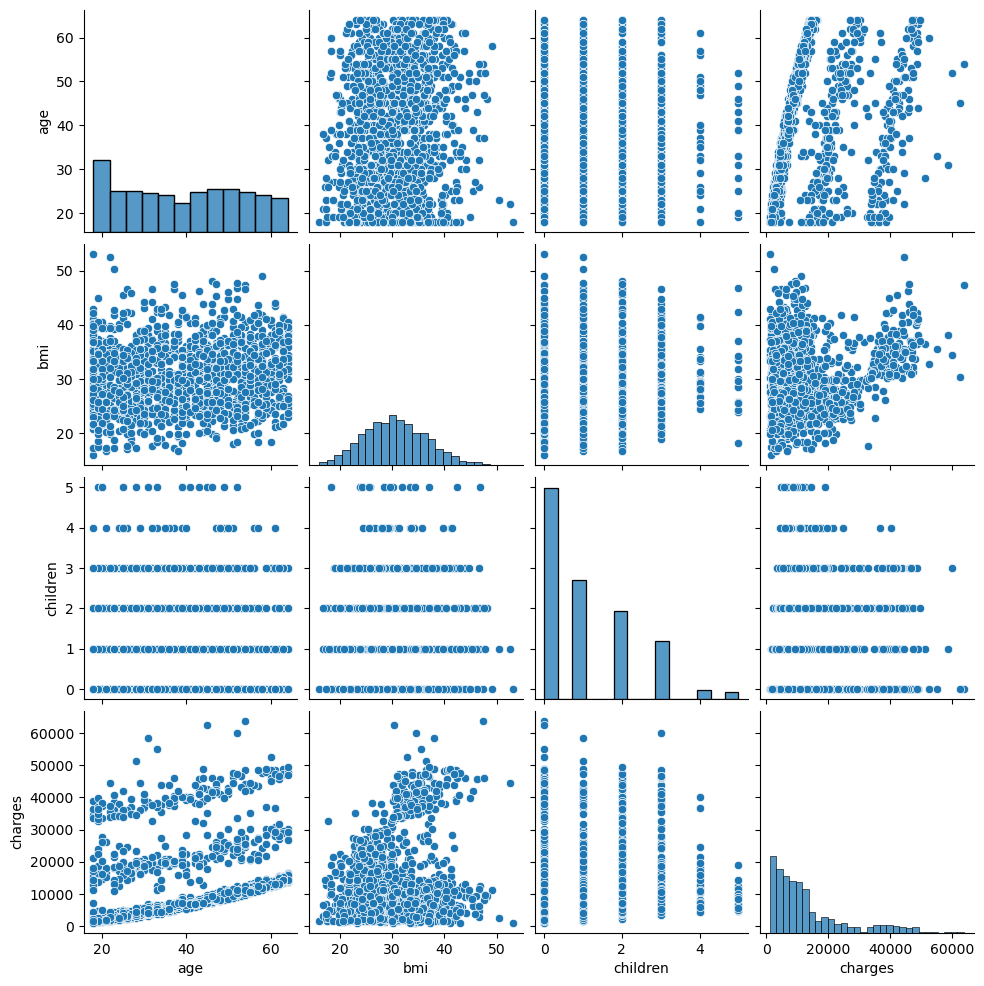

In [27]:
sns.pairplot(us_health)

In [ ]:
## Po regijama

<Axes: xlabel='smoker', ylabel='bmi'>

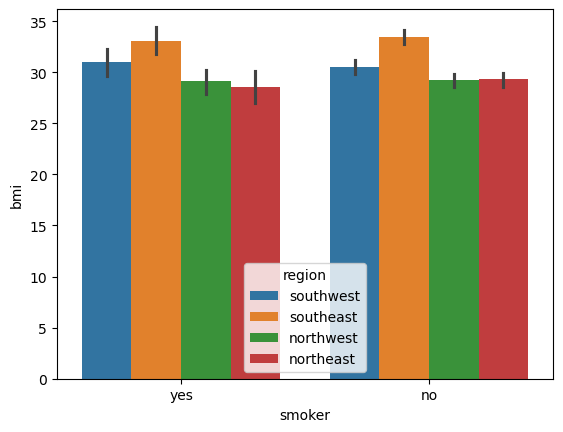

In [28]:
sns.barplot(x="smoker", y="bmi",hue="region", data=us_health)

<Axes: xlabel='smoker', ylabel='charges'>

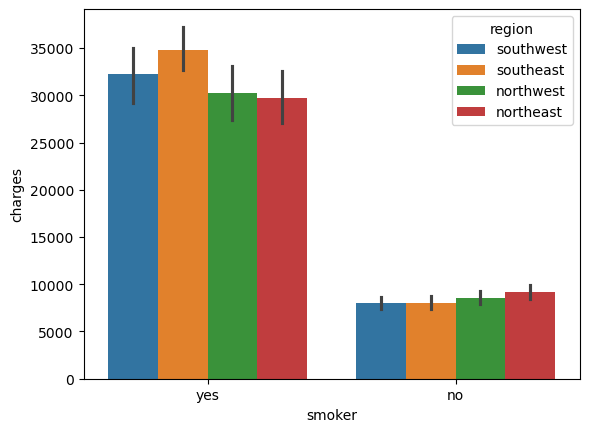

In [29]:
sns.barplot(x="smoker", y="charges",hue="region", data=us_health)

In [42]:
region_group=us_health.groupby(["region"])
region_group.mean("bmi")

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Text(0.5, 1.0, 'Broj pušača i nepušača s prosječnim BMI')

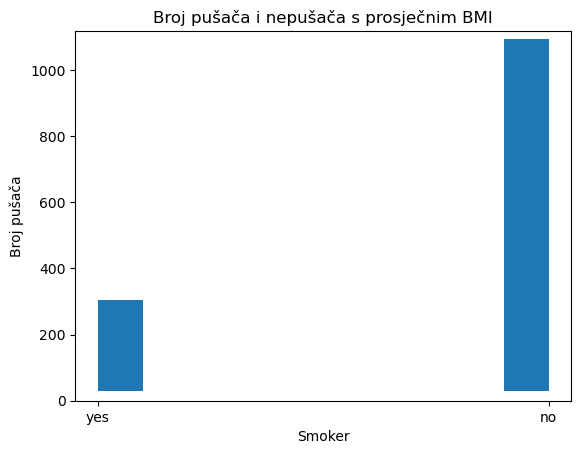

In [50]:
plt.hist(x=us_health["smoker"], y=us_health["bmi"].mean())
plt.xlabel("Smoker")
plt.ylabel("Broj pušača")
plt.title("Broj pušača i nepušača s prosječnim BMI")

<Axes: ylabel='count'>

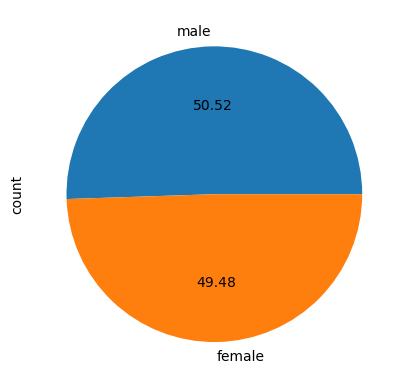

In [38]:
us_health['sex'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='count'>

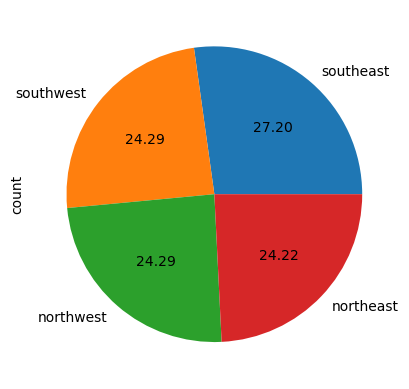

In [40]:
us_health['region'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='count'>

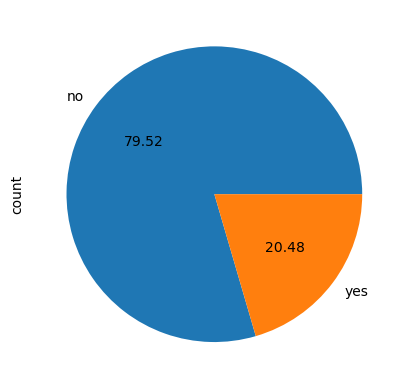

In [41]:
us_health['smoker'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='smoker', ylabel='bmi'>

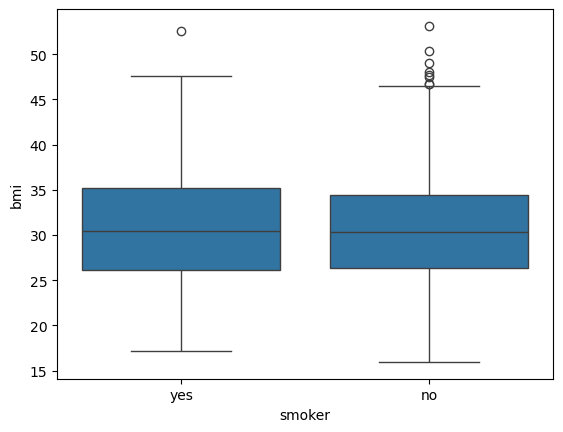

In [51]:
sns.boxplot (x = "smoker", y = "bmi", data = us_health)

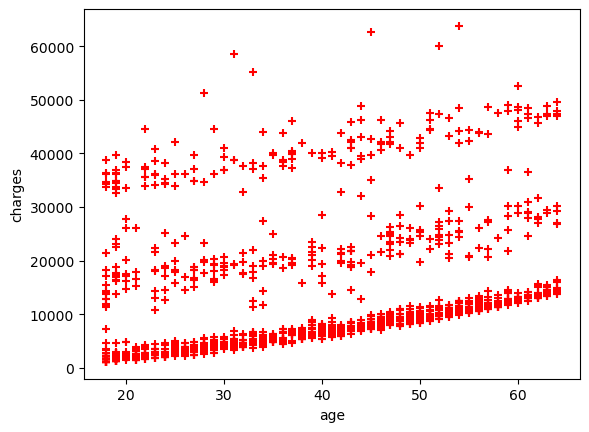

In [53]:
plt.xlabel('age')
plt.ylabel('charges')
plt.scatter(us_health.age, us_health.charges, color='red', marker='+')

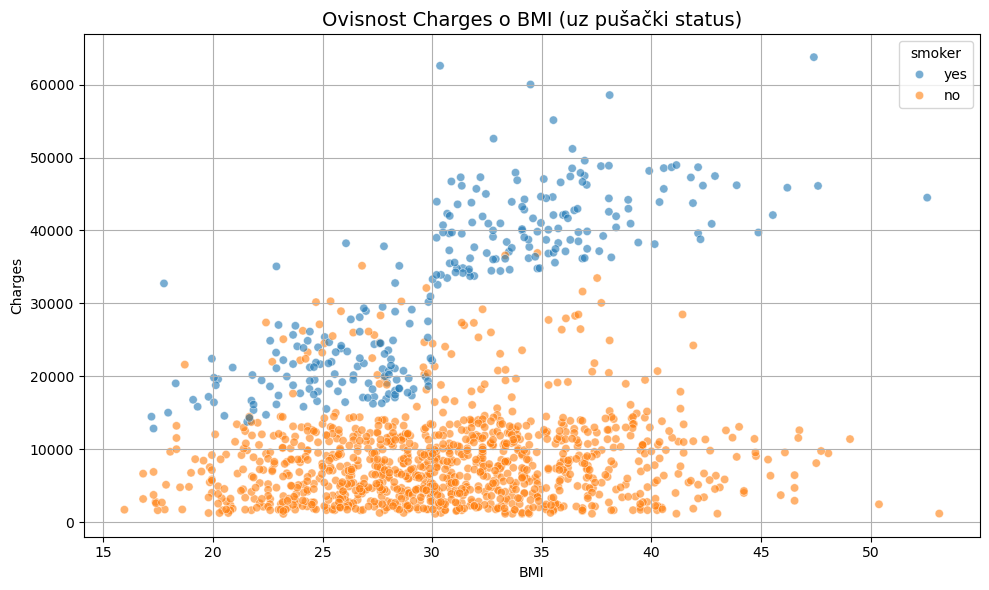

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=us_health, x='bmi', y='charges', hue='smoker', alpha=0.6)
plt.title('Ovisnost Charges o BMI (uz pušački status)', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.tight_layout()
plt.show()
